<a href="https://colab.research.google.com/github/Bazinga97/Deep-learning/blob/main/DL_23_feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('Social_Network_Ads.csv')

In [12]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

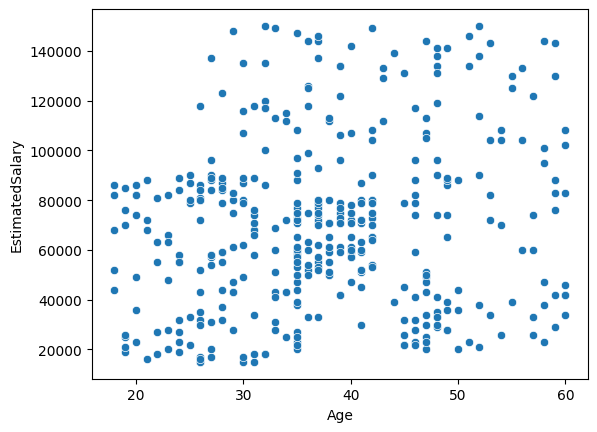

In [13]:
import seaborn as sns

sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])


In [14]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 28ms/step - loss: 2806.3667 - accuracy: 0.6531 - val_loss: 613.6398 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 885.8605 - accuracy: 0.3969 - val_loss: 631.4185 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 493.5785 - accuracy: 0.5781 - val_loss: 661.8986 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 272.7112 - accuracy: 0.4594 - val_loss: 36.1135 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 90.4833 - accuracy: 0.4969 - val_loss: 133.6748 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 80.7617 - accuracy: 0.5594 - val_loss: 201.1899 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 115.2609 - accuracy: 0.5469 - val_loss: 62.5076 - val_accu

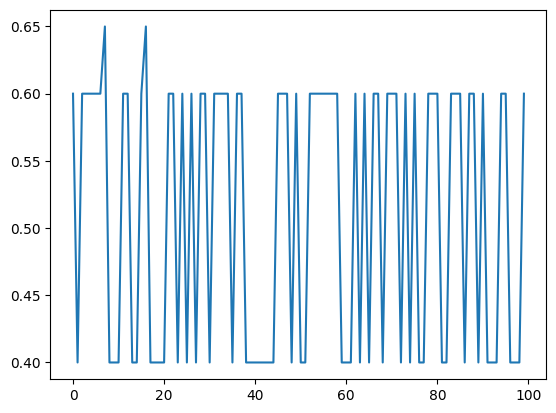

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [22]:
# Applying scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

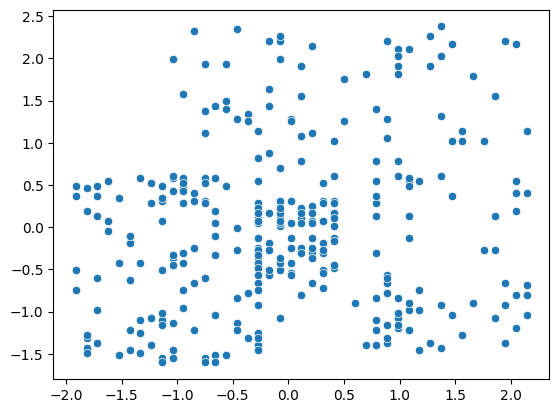

In [26]:


sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1])


In [27]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 0.6429 - accuracy: 0.6750 - val_loss: 0.6148 - val_accuracy: 0.6875
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5894 - accuracy: 0.7250 - val_loss: 0.5640 - val_accuracy: 0.7125
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5455 - accuracy: 0.7594 - val_loss: 0.5200 - val_accuracy: 0.7500
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5074 - accuracy: 0.7875 - val_loss: 0.4836 - val_accuracy: 0.7750
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4740 - accuracy: 0.7969 - val_loss: 0.4529 - val_accuracy: 0.7875
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4459 - accuracy: 0.8031 - val_loss: 0.4245 - val_accuracy: 0.7875
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4197 - accuracy: 0.8250 - val_loss: 0.4009 - val_accuracy: 0.8000
Epoch 8/100

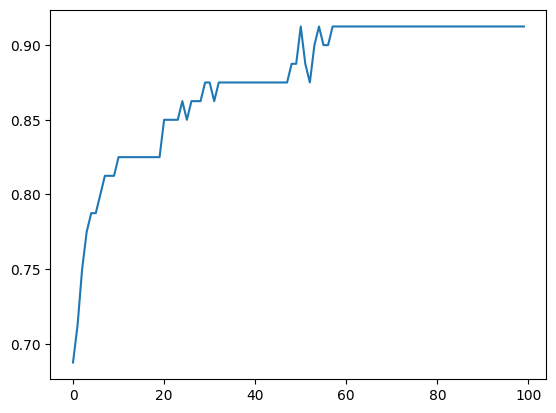

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])